## __EN2550 - Assignment 02__

##### Name : Kumara B.W.J.C.



##### Index Number : 190328V

In [1]:
import numpy as np
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
import math
import cv2 as cv
import  circle_fit as cf 

In [2]:
def CircleCenter(c1,c2,c3):
    c = (c1[0]-c2[0])**2 + (c1[1]-c2[1])**2
    a = (c2[0]-c3[0])**2 + (c2[1]-c3[1])**2
    b = (c3[0]-c1[0])**2 + (c3[1]-c1[1])**2
    s = 2*(a*b + b*c + c*a) - (a*a + b*b + c*c) 
    px = (a*(b+c-a)*c1[0] + b*(c+a-b)*c2[0] + c*(a+b-c)*c3[0]) / s
    py = (a*(b+c-a)*c1[1] + b*(c+a-b)*c2[1] + c*(a+b-c)*c3[1]) / s

    ar = np.sqrt(a)
    br = np.sqrt(b)
    cr = np.sqrt(c)
    r = ar*br*cr / np.sqrt((ar+br+cr)*(-ar+br+cr)*(ar-br+cr)*(ar+br-cr))

    return r, [px,py]

def CheckPoints(X,radius,center,t):
    inlier_count = 0;
    inliers = []
    outliers = []
    upper_thresh = radius+t
    lower_thresh = radius-t
    for p in X:
        dis = np.abs(np.sqrt((p[0]-center[0])**2+(p[1]-center[1])**2))
        if lower_thresh<=dis<=upper_thresh:
            inliers.append(p)
            inlier_count+=1
        else:
            outliers.append(p)
    return inliers,outliers,inlier_count
            




In [3]:
#RANSAC Algorithm
def RANSAC(X):
    s = 3  # Minimum number of points needed to fit to a circle is 3
    t = 1.96# to capture 95% of all inliers
    d = 50 
    p = 0.99
    e = 0.5
    N = int(np.ceil(np.log(1-p)/np.log(1-(1-e)**s)))

    max_inliers = 0;

    for i in range(N):
        c1,c2,c3 = X[np.random.randint(0,100)],X[np.random.randint(0,100)],X[np.random.randint(0,100)]
        radius, center = CircleCenter(c1,c2,c3)
        inliers, outliers, inlier_count = CheckPoints(X,radius,center,t)
        if max_inliers<inlier_count:
            max_inliers = inlier_count
            best_sample = np.array([list(c1),list(c2),list(c3)])
            best_inliers = np.array(inliers)
            best_outliers = np.array(outliers)
            best_radius = radius
            best_center = center
            
    fig, ax = plt.subplots(figsize = (12,12),facecolor = "white")
    
    best_circle = plt.Circle((best_center[0],best_center[1]),best_radius,color = 'blue',fill = False,label = "Best Circle")
    
    xr,yr ,rr,k = cf.least_squares_circle(best_inliers)
    RANSAC_circle = plt.Circle((xr,yr),rr,color = 'm',fill = False,label = "RANSAC")

    ax.scatter(best_outliers[:,1],best_outliers[:,0], c= 'blue',label = "Outliers")
    ax.scatter(best_inliers[:,1],best_inliers[:,0],c = 'green',label = "Inliers")
    ax.scatter(best_sample[:,1],best_sample[:,0],c = 'red',label = "Best Sample")

    ax.add_patch(best_circle)
    ax.add_patch(RANSAC_circle)
    ax.legend(loc = "upper right")

    ax.set_title("RANSAC Circle fitting")
    plt.show()
        

    
    



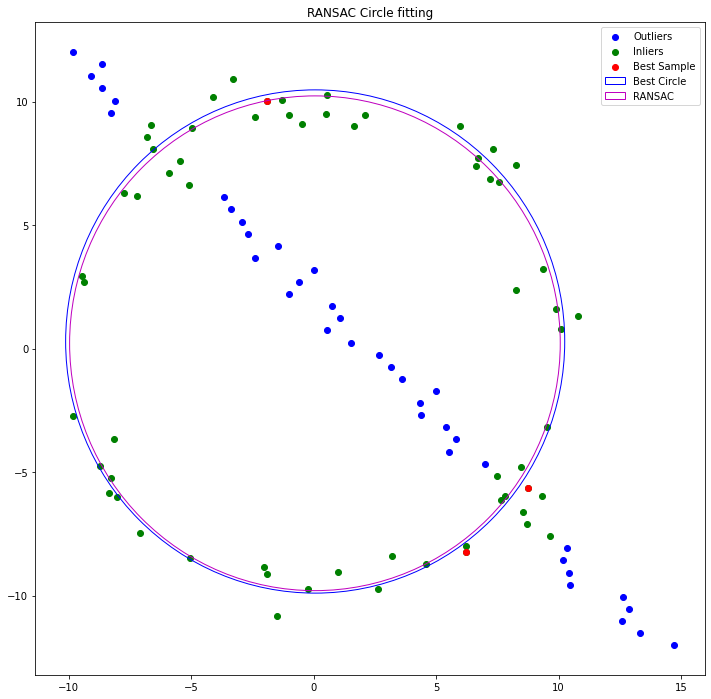

In [17]:


N=100
half_n = N//2
r =10
s =r/16
t =np.random.uniform(0,2*np.pi,half_n)

n = s*np.random.randn(half_n)
x,y = (r+n)*np.cos(t), (r+n)*np.sin(t)
X_circ = np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
m,b = -1,2
x = np.linspace(-12,12,half_n)
y =m*x + b +s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n,1),y.reshape(half_n,1)))
X = np.vstack((X_circ,X_line))

RANSAC(X)



In [39]:
def click_event(event, x, y, flags, params):
    global locs
    global points
    global image_copy

    if event == cv.EVENT_LBUTTONDOWN:
        locs.append([x, y])
        points += 1
        image_copy = cv.circle(image_copy, (x,y), 3, (0, 0, 255), -1)
        cv.imshow("Image", image_copy)        
    
    if points == 4:
        cv.destroyAllWindows()
        cv.waitKey(1)
        

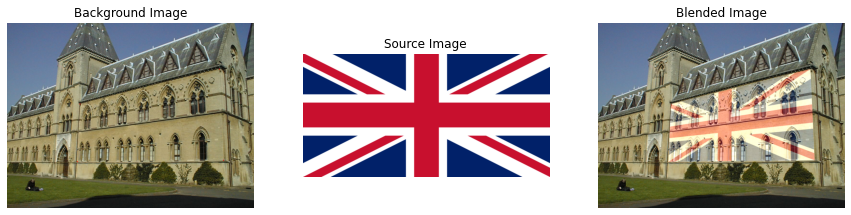

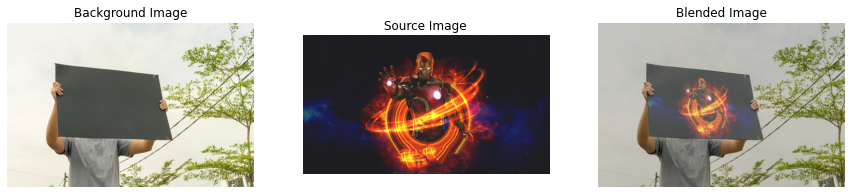

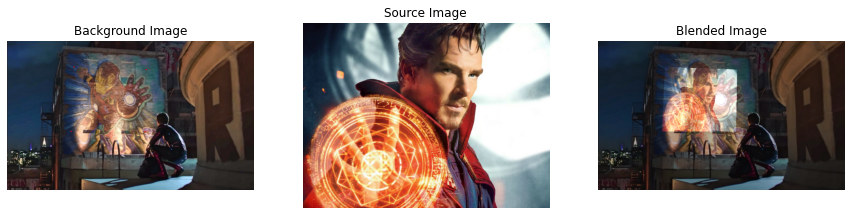

In [57]:
points = []
clicks=0  

# Function to select four points from the destination image
def click_event(event, x, y, flags, params):
    global points
    global clicks
    if clicks == 4:
        return  
    if event == cv.EVENT_LBUTTONDOWN:
        points.append([x,y])
        clicks+=1

        font = cv.FONT_HERSHEY_SIMPLEX
        cv.circle(img,(x,y),2, (0, 0, 255), -1)
        cv.imshow('image', img)
    
#List of source and destination images
source_images = ["Images/uk.png","Images/ironman.jpg","Images/strange.jpg"]
background_images = ['Images/002.jpg',"Images/poster.jpg","Images/spider.jpg"]
coffs = [(1,0.4,0.2),(0.8,0.7,0),(0.7,0.6,0)]

images = []

for i in range(len(source_images)): # Loop for all the images
    if len(images)==i+1:pass
    points = []
    clicks = 0
    # Reading bckground image
    img = cv.imread(background_images[i], 1)

    # displaying the image
    cv.imshow('image', img)

    #getting 
    cv.setMouseCallback('image', click_event)
   
    # wait for a key to be pressed to exit
    cv.waitKey(0)

    # close the window
    cv.destroyAllWindows()

    # Read source image.
    im_src = cv.imread(source_images[i])
    w,h = im_src.shape[1],im_src.shape[0]

    # Four corners of the book in source image
    pts_src = np.array([[0, 0], [w-1, 0], [w-1, h-1],[0, h-1]])

    # Read destination image.
    im_dst = cv.imread(background_images[i])

    # Four corners of the book in destination image.
    pts_dst = np.array(points)

    # Calculate Homography
    h, status = cv.findHomography(pts_src, pts_dst)

    # Warp source image to destination based on homography
    im_out = cv.warpPerspective(im_src, h, (im_dst.shape[1],im_dst.shape[0]))
   
    blended_img = cv.addWeighted(im_dst, coffs[i][0], im_out, coffs[i][1], coffs[i][2])
    images.append([img,im_src,blended_img]) #background,source,blend
    cv.imshow("Blended Image", blended_img)
    cv.waitKey(0)


    cv.destroyAllWindows()
    
    
for im in images:
    fig,ax = plt.subplots(1,3,figsize=(15,10),facecolor = "white")
    titles=['Background Image','Source Image','Blended Image']
    for j in range(3):
        transformed_img_ = cv.cvtColor(im[j],cv.COLOR_BGR2RGB)
        ax[j].axis('off')
        ax[j].imshow(transformed_img_)
        ax[j].set_title(titles[j])